In [1]:
# Core
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image
from PIL import Image

# Style
sns.set(style="whitegrid")

/Users/vantiennguyen/miniforge3/envs/covid_ai/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path = "../data/COVID-19_Radiography_Dataset"
classes = ["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

class_paths = {
    cls: os.path.join(path, cls, "images")
    for cls in classes
}

class_paths

{'COVID': '../data/COVID-19_Radiography_Dataset/COVID/images',
 'Lung_Opacity': '../data/COVID-19_Radiography_Dataset/Lung_Opacity/images',
 'Normal': '../data/COVID-19_Radiography_Dataset/Normal/images',
 'Viral Pneumonia': '../data/COVID-19_Radiography_Dataset/Viral Pneumonia/images'}

In [5]:
data_summary = []

for cls, folder in class_paths.items():
    num_images = len([
        f for f in os.listdir(folder)
        if f.lower().endswith((".png", ".jpg", ".jpeg"))
    ])
    data_summary.append([cls, num_images])

df_counts = pd.DataFrame(data_summary, columns=["Class", "Image_Count"])
df_counts

,Class,Image_Count
0,COVID,3616
1,Lung_Opacity,6012
2,Normal,10192
3,Viral Pneumonia,1345


/var/folders/c3/11vnlrg5531387cyn4j7c9_r0000gn/T/ipykernel_48906/3479812865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x="Class", y="Image_Count", palette="viridis")


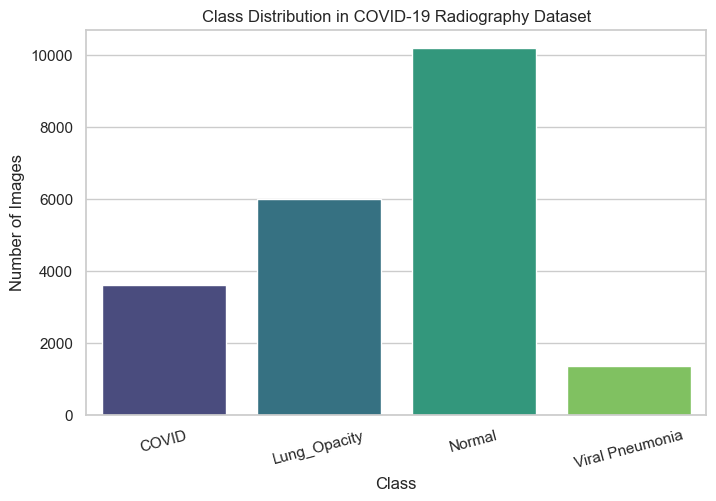

In [6]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_counts, x="Class", y="Image_Count", palette="viridis")
plt.title("Class Distribution in COVID-19 Radiography Dataset")
plt.ylabel("Number of Images")
plt.xticks(rotation=15)
plt.show()

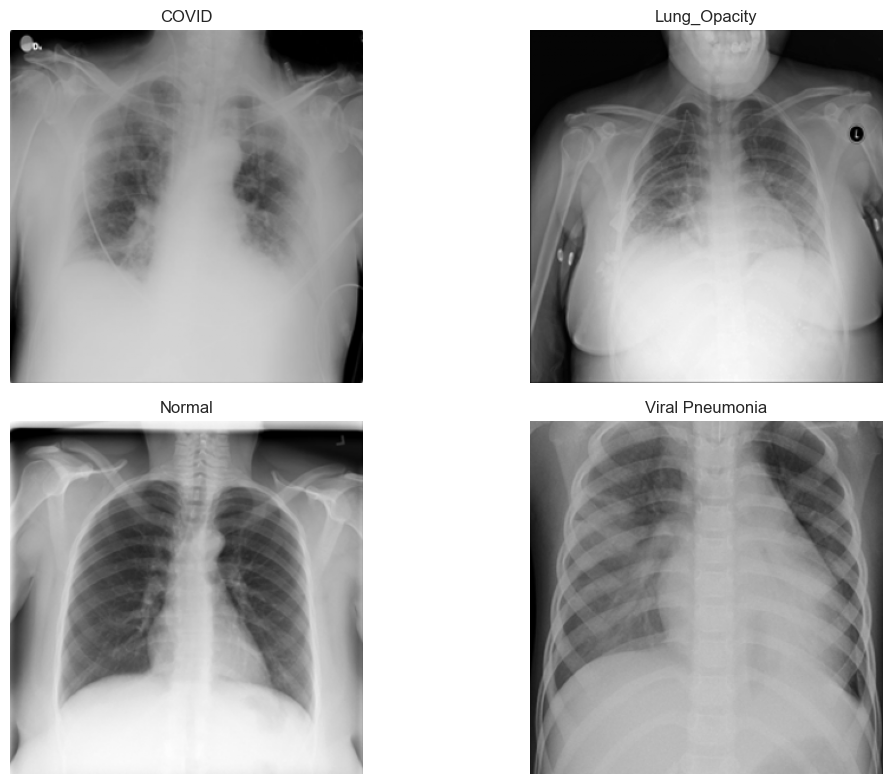

In [7]:
plt.figure(figsize=(12, 8))

for i, cls in enumerate(classes):
    folder = class_paths[cls]
    img_name = os.listdir(folder)[0]
    img_path = os.path.join(folder, img_name)

    img = Image.open(img_path)

    plt.subplot(2, 2, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [8]:
sizes = []

for cls, folder in class_paths.items():
    for img_name in os.listdir(folder)[:200]:  # sample
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        sizes.append(img.size)

sizes_df = pd.DataFrame(sizes, columns=["Width", "Height"])
sizes_df.describe()

,Width,Height
count,800.0,800.0
mean,299.0,299.0
std,0.0,0.0
min,299.0,299.0
25%,299.0,299.0
50%,299.0,299.0
75%,299.0,299.0
max,299.0,299.0


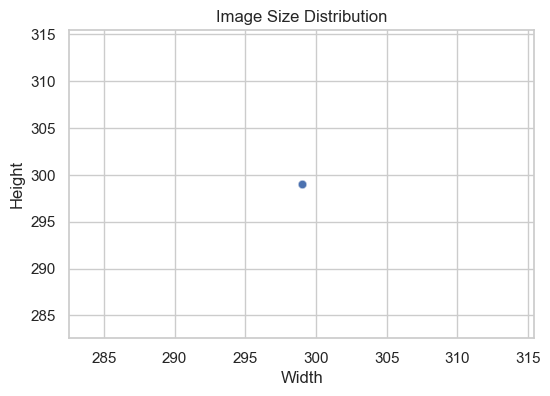

In [9]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=sizes_df["Width"], y=sizes_df["Height"], alpha=0.3)
plt.title("Image Size Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()